<a href="https://colab.research.google.com/github/JuanRosales707/laboratoio08-Cuellar/blob/main/LABORATORIO_09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **a. Utilizando el dataset de cáncer de mama del repositorio UCI y la librería scikit-learn de Python, crea una red neuronal para clasificar pacientes (canceroso/no canceroso) maximizando la precisión (accuracy). Esto implica preprocesar los datos y ajustar los parámetros de la red neuronal, como el número de capas ocultas y neuronas por capa, las iteraciones, la función de activación y el método de optimización.**

In [1]:
# Cargar librerías necesarias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Cargar el archivo CSV
from google.colab import files
uploaded = files.upload()

Saving cancer.csv to cancer.csv


In [3]:
# Leer archivo y mostrar vista previa
data = pd.read_csv("cancer.csv")
data = data.drop(columns=["Unnamed: 0"])  # Eliminar columna innecesaria
data.head()

,ClumpThick,UnifCellSize,UnifCellShape,MargAdh,SingEpiCellSize,BareNuclei,BlandChromatin,NormalNucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0


In [4]:
# Separar variables predictoras (X) y la clase (y)
X = data.drop(columns=["Class"])
y = data["Class"]

# Dividir los datos en entrenamiento y prueba (70% - 30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalización de los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [5]:
# Crear una red neuronal con parámetros ajustados
mlp = MLPClassifier(hidden_layer_sizes=(20, 10),    # Dos capas ocultas con 20 y 10 neuronas
                    max_iter=1500,                 # Mayor número de iteraciones
                    activation='relu',             # Función de activación ReLU
                    solver='adam',                 # Método para minimizar error
                    random_state=42)

mlp.fit(X_train_scaled, y_train)

MLPClassifier(hidden_layer_sizes=(20, 10), max_iter=1500, random_state=42)

Accuracy: 0.9523809523809523

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       143
           1       0.95      0.90      0.92        67

    accuracy                           0.95       210
   macro avg       0.95      0.94      0.94       210
weighted avg       0.95      0.95      0.95       210



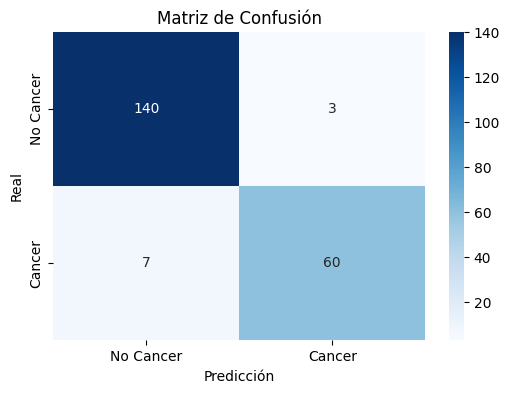

In [6]:
# Hacer predicciones
y_pred = mlp.predict(X_test_scaled)

# Evaluar precisión
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Reporte de clasificación
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Cancer', 'Cancer'], yticklabels=['No Cancer', 'Cancer'])
plt.title("Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()


### **b. Utilizando la base de datos Fashion MNIST importada desde Keras (60,000 imágenes de ropa de 28x28 píxeles, 10 clases), crea una red neuronal convolucional para clasificar las imágenes por tipo de ropa, buscando maximizar la precisión (accuracy). Esto requiere ajustar los parámetros de la red, como el número de capas convolucionales y densas, el número de filtros y neuronas, las iteraciones, la función de activación y el optimizador.**

In [7]:
# Librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [8]:
# Cargar Fashion MNIST desde Keras
fashion_mnist = keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Etiquetas de clase
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [9]:
# Normalizar las imágenes (0 a 1)
X_train = X_train / 255.0
X_test = X_test / 255.0

# Expandir dimensiones para CNN [28, 28] → [28, 28, 1]
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [10]:
# Definir el modelo
model = models.Sequential()

# Capa convolucional + maxpooling
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))

# Segunda capa convolucional
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Tercera capa convolucional
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Aplanar + densas
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))  # 10 clases

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
# Paso 6: Compilación del modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Paso 7: Entrenamiento
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 68s 35ms/step - accuracy: 0.7550 - loss: 0.6763 - val_accuracy: 0.8585 - val_loss: 0.3920
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 35ms/step - accuracy: 0.8778 - loss: 0.3353 - val_accuracy: 0.8842 - val_loss: 0.3290
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 61s 33ms/step - accuracy: 0.8960 - loss: 0.2809 - val_accuracy: 0.8930 - val_loss: 0.2933
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 34ms/step - accuracy: 0.9079 - loss: 0.2476 - val_accuracy: 0.8983 - val_loss: 0.2917
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 63s 33ms/step - accuracy: 0.9182 - loss: 0.2190 - val_accuracy: 0.8986 - val_loss: 0.2795
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 33ms/step - accuracy: 0.9246 - loss: 0.1998 - val_accuracy: 0.9002 - val_loss: 0.2790
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 33ms/step - accuracy: 0.9320 - loss: 0.1829 - val_accuracy: 0.9050 - val_loss: 0.2743
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 32ms/step - accuracy: 0.9380 -

In [12]:
# Evaluar en test
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print("\nPrecisión en test:", test_acc)

313/313 - 5s - 15ms/step - accuracy: 0.9018 - loss: 0.3207

Precisión en test: 0.9017999768257141


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


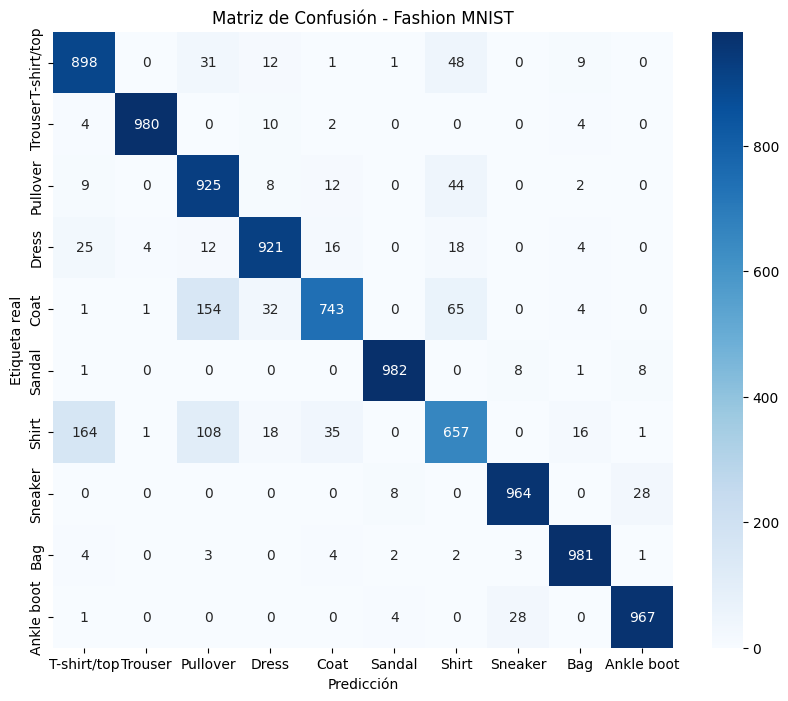


Reporte de clasificación:
              precision    recall  f1-score   support

 T-shirt/top       0.81      0.90      0.85      1000
     Trouser       0.99      0.98      0.99      1000
    Pullover       0.75      0.93      0.83      1000
       Dress       0.92      0.92      0.92      1000
        Coat       0.91      0.74      0.82      1000
      Sandal       0.98      0.98      0.98      1000
       Shirt       0.79      0.66      0.72      1000
     Sneaker       0.96      0.96      0.96      1000
         Bag       0.96      0.98      0.97      1000
  Ankle boot       0.96      0.97      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [13]:
# Matriz de confusión
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

conf_mat = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10,8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicción')
plt.ylabel('Etiqueta real')
plt.title("Matriz de Confusión - Fashion MNIST")
plt.show()

# Reporte de clasificación
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred_classes, target_names=class_names))